In [9]:

import math
import sys 
import pickle
import scipy.optimize as spo


sys.path.append('..')
from Network_sim import *
import pathos as pa
import multiprocessing as mp
from multiprocessing.pool import ThreadPool as Pool 
import pandas as pd
import itertools
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from pathlib import Path

from brian2 import pF, ms, pA, nA, mV, Hz, ohm
import numpy as np

# Display plots inside Jupyter cell
%matplotlib inline
# Set the dots-per-inch (resolution) of the images
mpl.rcParams['figure.dpi'] = 90

np.set_printoptions(threshold=sys.maxsize)


In [10]:
now = datetime.datetime.now() # current date and time
date_time = now.strftime("%m_%d_%Y_%H_%M_%S")
results = []
df_results = pd.DataFrame()

# Network Analysis- Single Network Detailed

In [24]:
main_conf={
        'simulation_duration':1,#in seconds
        'input_spike_freq':200,
        'N_neurons':50,
        'spike_inp_start':0,
        'spike_inp_end':.1,
        'irregularity_weight':8,#8
        'irregularity_freq':20,#20
        'irregularity_key':False,
        'detailed_monitors':True
        }

weight_conf={
        'syn_inpPC':10, #5
        'syn_inpPV':10, #5
        'syn_inpSST':0,
        'syn_PC':15,#5
        'syn_PV':5,#5
        'syn_SSTPC':0,
        'syn_PVPC':5,#10
        'syn_PCSST':0,#20
        'syn_PCPV':12,#10
        'syn_PVSST':0,
        'syn_SSTPV':0#
        }

PC_conf =  {
        "Isoma_dpi_tau" : 2.8* pA,
        "Isoma_th" : 200*pA, 
        "alpha_soma": 1,
        "Isoma_ahp_tau": 3 * pA, 
        "Isoma_ahp_w" : 70 * pA,
        "alpha_ahp" : 2, 
        "soma_refP": 10 * ms,
        "Isoma_const": 150 *pA 
    }

PV_conf = {
    "Isoma_dpi_tau" :  7.5* pA,
    "Isoma_th"  : 3* nA,  
    "alpha_soma": 2.7,
    
    "Isoma_ahp_tau": 0 * pA,             
    "Isoma_ahp_w" : 0 * pA,
    "alpha_ahp"  : 1,  
    
    "soma_refP": 2.5 * ms,
    "Isoma_const": 150 *pA

    
    }
    
SST_conf = {
    "Isoma_dpi_tau" :  1* pA,  
    "alpha_soma": 1,
    "Isoma_th"  : 1* nA,  

    "Isoma_ahp_tau": 30 * pA,  
    "Isoma_ahp_w" : 500 * pA,
    
    "soma_refP": 2 * ms,
    "Isoma_const": 150 *pA
        }
        
syn_PV_conf = {
        "Iampa_std_tau": 10 * pA,
        "Va" :150*mV,
        "Vw" :150*mV,
        "tau_pulse" : 3 *ms,
        "Idischarge_w":5*pA,


        "Iampa_w0":20*pA
        } 

syn_PC_conf = {
        "Iampa_tau": 5 * pA,
         "alpha_ampa": 4,
        "Iampa_w0":10*pA
        }

syn_SST_conf = {
        "Iampa_tau": .1 * pA,
        'alpha_ampa': 10,
        "Iampa_w0":0*pA
        }




In [25]:
[Network_Output,Current_Monitors]=Network_sim(main_conf,PC_conf,PV_conf,SST_conf,syn_PC_conf,syn_PV_conf,syn_SST_conf,weight_conf)

Process 591408 launched, at 08_12_2022_18_36_22
50
40 neurons are allocated from Core_1.
6 neurons are allocated from Core_2.
4 neurons are allocated from Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.


In [26]:
import warnings
warnings.filterwarnings("ignore")
[Max_fr,Ave_fr]=Network_firing_rates(Network_Output,main_conf['simulation_duration'])
[PC_CV_average,PV_CV_average,SST_CV_average]=cv_squared(Network_Output,main_conf['spike_inp_end'])
[PC_synchrony,PV_synchrony,SST_synchrony]=network_synchrony(main_conf,Network_Output)
[PC_max_fr,PV_max_fr,SST_max_fr]=Max_fr
[PC_ave_fr,PV_ave_fr,SST_ave_fr]=Ave_fr


print('Average firing rate in populations PC:'+str(PC_ave_fr)+' PV: '+str(PV_ave_fr)+' SST: '+str(SST_ave_fr))
print('Maximum firing rate in populations PC:'+str(PC_max_fr)+' PV: '+str(PV_max_fr)+' SST: '+str(SST_max_fr))
print('Cv Squared Values are PC:'+str(PC_CV_average)+' PV: '+str(PV_CV_average)+' SST: '+str(SST_CV_average))
print('Synchrony Values are PC:'+str(PC_synchrony)+' PV: '+str(PV_synchrony)+' SST: '+str(SST_synchrony))

SST did not fire in the whole simulation
SST has no spikes
Average firing rate in populations PC:54.79 PV: 25.4 SST: 0
Maximum firing rate in populations PC:90. Hz PV: 90. Hz SST: 0
Cv Squared Values are PC:0.15998953840538443 PV: 0.12912298659805513 SST: 100
Synchrony Values are PC:0.5789780662716816 PV: 0.2886201810225156 SST: nan


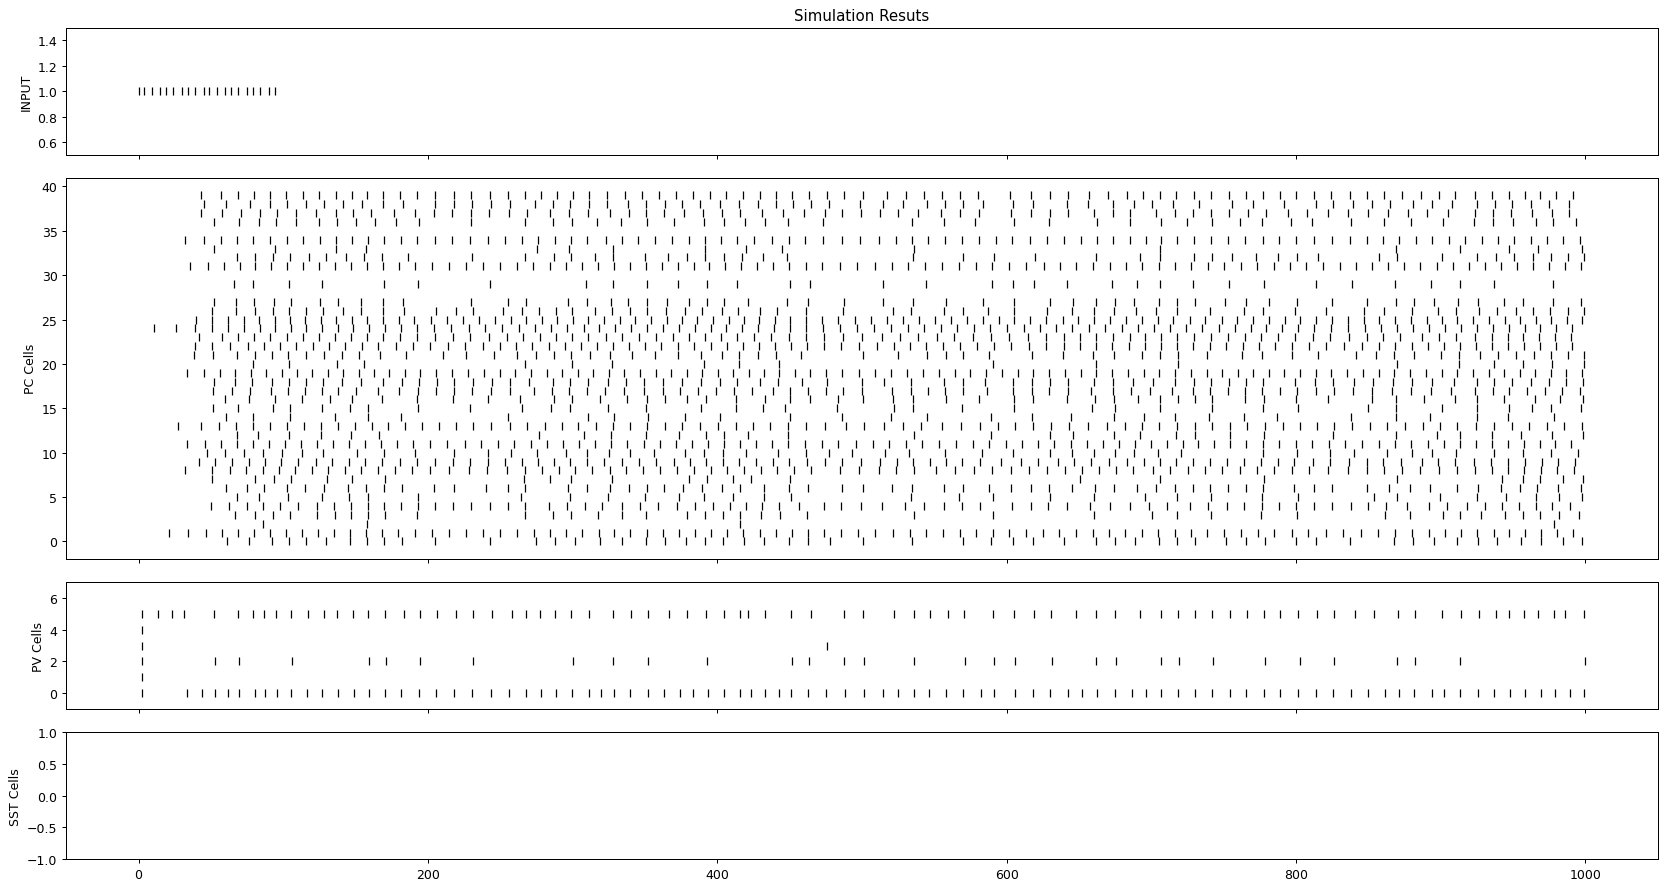

In [27]:
#graphs the output fo the cells of the network
fig_network=Graph_network(Network_Output,main_conf['simulation_duration'])

50


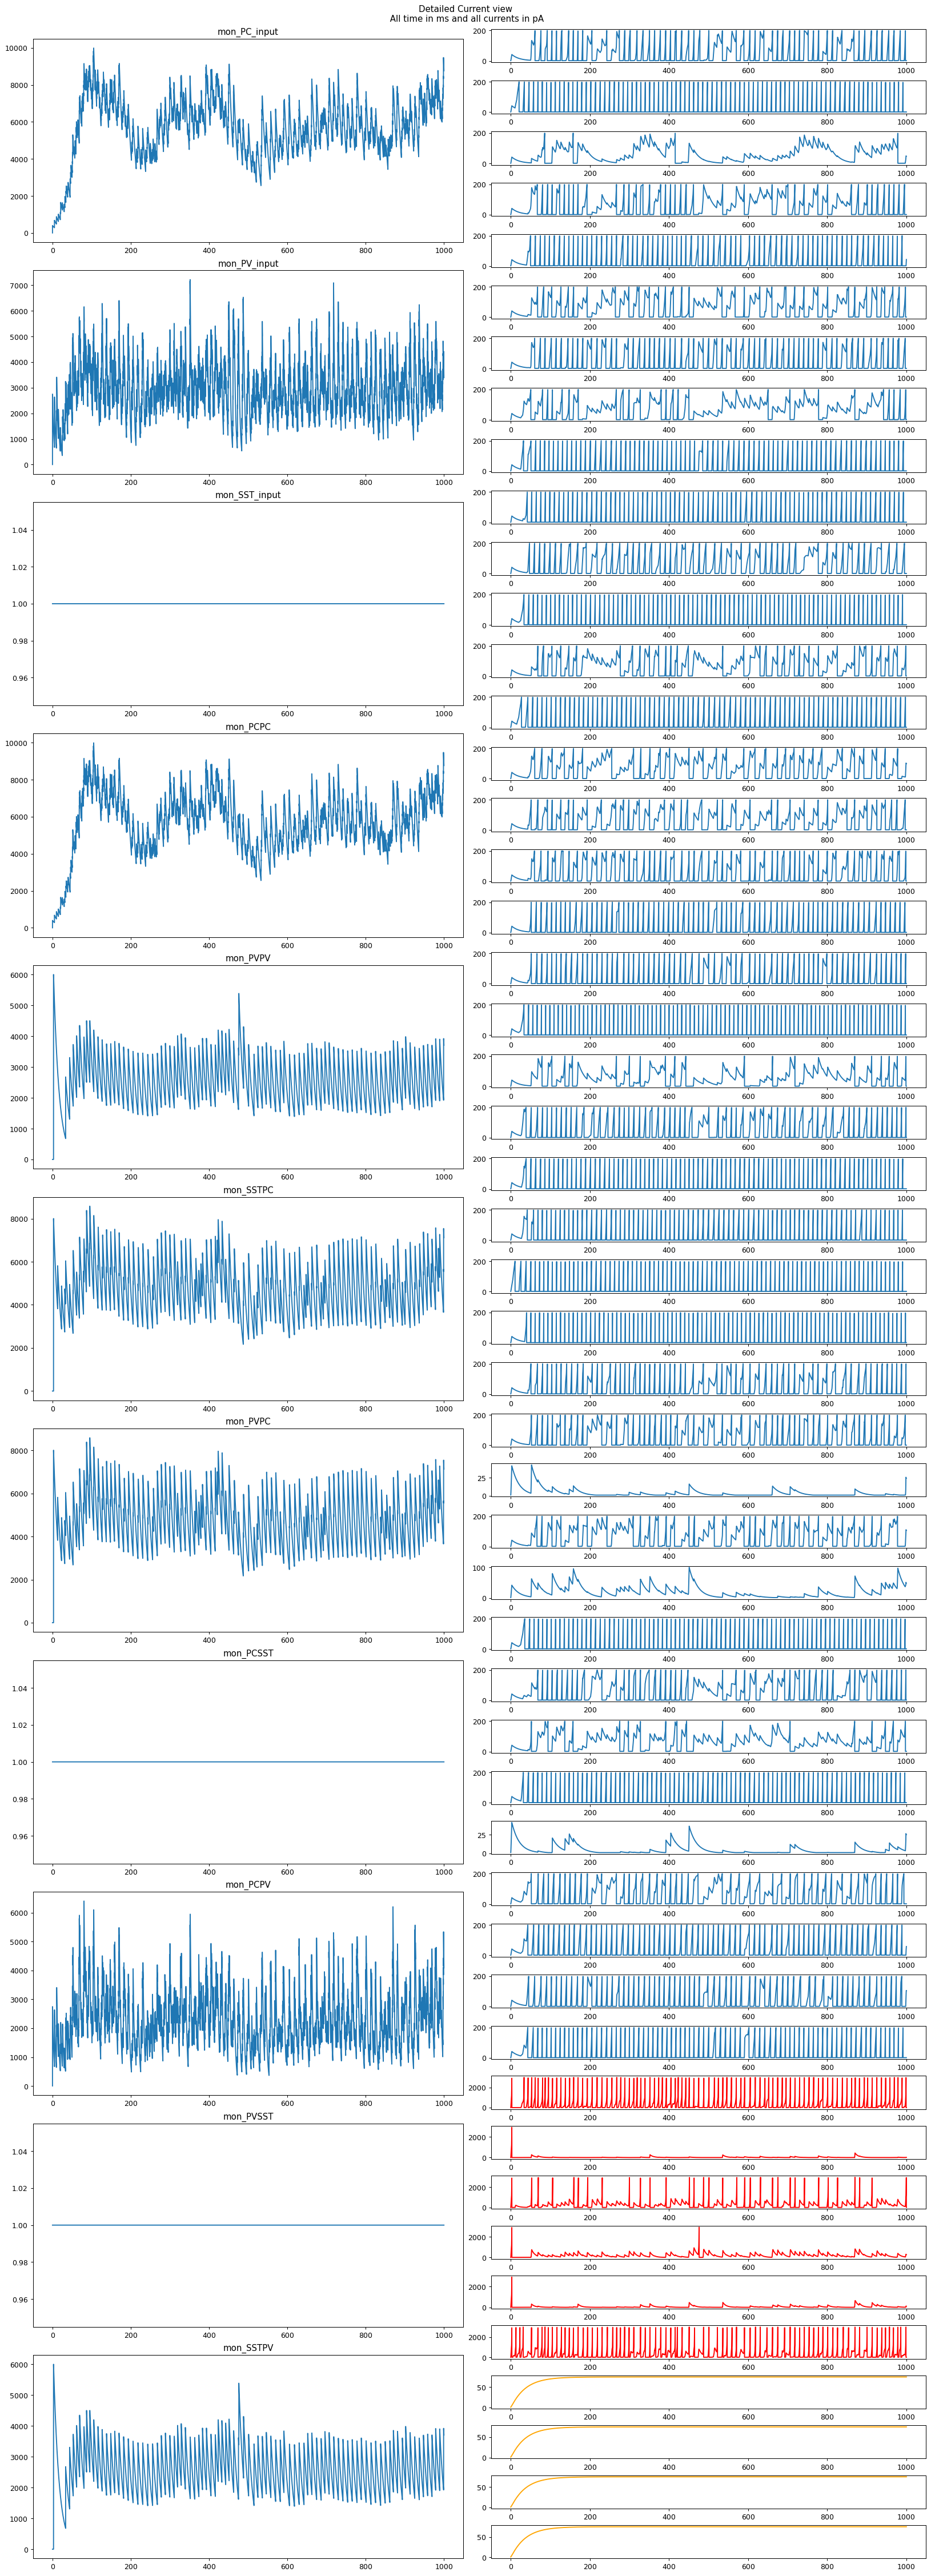

In [28]:
fig_currents=Graph_currents(Current_Monitors)

In [8]:
##RUN THIS TO save all SAVE ALLL
root=Path(".")
name="Post_FF_EI_Balance"
Parameter_Dictionary_str="Parameter_Dictionaries_"+name
my_path=root/"Network_Results"/Parameter_Dictionary_str

Parameter_Dictionaries={
    'main_conf':main_conf,
    'PC_conf':PC_conf,
    'PV_conf':PV_conf,
    'SST_conf':SST_conf,
    'syn_PC_conf':syn_PC_conf,
    'syn_PV_conf':syn_PV_conf,
    'syn_SST_conf':syn_SST_conf,
    'weight_conf':weight_conf
}

my_file = open(my_path, 'wb')
my_file = pickle.dump(Parameter_Dictionaries, my_file)

fig_network.savefig("Network_Results/Network_Output_"+name+".jpeg")
fig_currents.savefig("Network_Results/Current_Monitors_"+name+".jpeg")


In [ ]:
root=Path(".")

with open(root/"Network_Results"/"Parameter_Dictionaries_PV_PC_other", 'rb') as handle:
    b = pickle.load(handle)

print(b["main_conf"])

{'simulation_duration': 20, 'input_spike_freq': 5. * hertz, 'N_neurons': 30, 'spike_inp_start': 5, 'spike_inp_end': 15, 'irregularity_weight': 7, 'irregularity_key': True, 'detailed_monitors': True}


# SWEEP and OPTIMIZED Simulations

In [ ]:
#multiple frequencies
'''
freq_list=[10,50,500]*Hz
for freq in freq_list:
    dict={'input_spike_freq':500}
    main_conf.update(dict)

    [Network_Output,Current_Monitors]=Network_sim(main_conf,PC_conf,PV_conf,SST_conf,syn_PC_conf,syn_PV_conf,syn_SST_conf,weight_conf)  
    Graph_network(Network_Output,5)
'''

### multiple weights single processor

In [ ]:


parameter_list_2=linspace(1,20,40)
parameter_list_1=linspace(1,20,40)
parameter_list_3=linspace(1,20,40)

Results_param_1=[]
Results_param_2=[]
Results_param_3=[]
Results_PC=[]
Results_PV=[]
Results_SST=[]

dict={'detailed_monitors':False}
main_conf.update(dict)
for param1 in parameter_list_1:
    for param2 in parameter_list_2:
        for param3 in parameter_list_3:
            dict={'syn_PCPV':param2}
            weight_conf.update(dict)

            dict={'syn_PC':param1}
            weight_conf.update(dict)
            
            dict={'syn_PVPC':param3}
            weight_conf.update(dict)


        [Network_Output,Current_Monitors]=Network_sim(main_conf,PC_conf,PV_conf,SST_conf,syn_PC_conf,syn_PV_conf,syn_SST_conf,weight_conf)  
        [PC_average,PV_average,SST_average]=cv_squared(Network_Output,main_conf['spike_inp_end'])

        Results_param_1.append(param1)
        Results_param_2.append(param2)
        Results_param_3.append(param3)
        Results_PC.append(PC_average)
        Results_PV.append(PV_average)
        Results_SST.append(SST_average)

np.save('Results_param_1.npy',Results_param_1)
np.save('Results_param_2.npy',Results_param_2)
np.save('Results_param_3.npy',Results_param_3)
np.save('results_PC.npy',Results_PC)
np.save('results_PV.npy',Results_PV)
np.save('results_SST.npy',Results_SST)       

Process 251892 launched, at 08_02_2022_17_26_37
40 neurons are allocated from Core_1.
6 neurons are allocated from Core_2.
4 neurons are allocated from Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
PC has no spikes
PV has no spikes
SST has no spikes
Process 251892 launched, at 08_02_2022_17_27_01
40 neurons are allocated from Core_1.
6 neurons are allocated from Core_2.
4 neurons are allocated from Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
PV has no spikes
SST has no spikes
Process 251892 launched, at 08_02_2022_17_27_24
40 neurons are allocated from Core_1.
6 neurons are allocated from Core_2.
4 neurons are 

In [41]:
x_axis=np.load('x_axis.csv.npy')
y_axis=np.load('y_axis.csv.npy')
Results_PC=np.load('results_PC.csv.npy')
Results_PV=np.load('results_PV.csv.npy')
Results_SST=np.load('results_SST.csv.npy')

(0.0, 20.0)

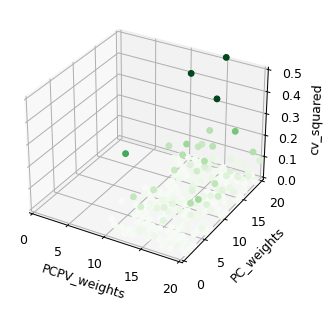

In [63]:

ax = plt.axes(projection='3d')
ax.scatter3D(x_axis, y_axis, Results_PV, c=Results_PV, cmap='Greens', vmin = 0, vmax = .5)
ax.set_ylabel('PC_weights')
ax.set_xlabel('PCPV_weights')
ax.set_zlabel('cv_squared')
ax.set_zlim(0,.5)
ax.set_xlim(0,20)
ax.set_ylim(0,20)

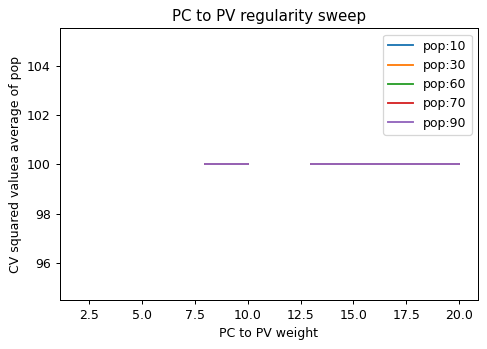

In [36]:

parameter_list_2=linspace(1,20,20)
parameter_list_1=[10,30,60,70,90]

for i in range(len(parameter_list_1)):
    plt.plot(parameter_list_2, Results[i][0], label = 'pop:'+str(parameter_list_1[i]))

plt.legend()
plt.title('PC to PV regularity sweep')
plt.ylabel('CV squared valuea average of pop')
plt.xlabel('PC to PV weight')
plt.show()  

In [ ]:
print(PC_list)
print(SST_list)
print(PV_list)

In [ ]:
numpy.save('PC_list.csv',PC_list)
numpy.save('PV_list.csv',PV_list)

In [1]:
PC_list=np.load('PC_list.csv.npy')
PV_list=np.load('PV_list.csv.npy')

NameError: name 'np' is not defined

In [19]:


parameter_list=[1,2,3,4,5,6,7,8,9,10,15,20,30,40]
plt.plot(parameter_list, PC_list, label = "PC pop")
plt.plot(parameter_list, PV_list, label = "PV pop")
plt.legend()
plt.title('PC to PV regularity sweep')
plt.ylabel('CV squared valuea average of pop')
plt.xlabel('PC to PV weight')
plt.show()





NameError: name 'PC_list' is not defined

In [ ]:
#Simulation of fin_fout for PV and PC pops 
#this simulation dies alot
#cant be completed

'''
run=False

if run==True:
    freq_list=[10,30,50,70,90,100,150,200,300,400,500]*Hz
    f_out_PC=[]
    f_out_PV=[]

    for freq in freq_list:
        dict={'input_spike_freq':freq,
        'detailed_monitors':False}
        main_conf.update(dict)
        [Max_fr,Ave_fr]=Network_firing_rates(Network_Output,main_conf['simulation_duration'])
        f_out_PC.append(Ave_fr[0])
        f_out_PV.append(Ave_fr[1])
        Network_sim(main_conf,PC_conf,PV_conf,SST_conf,syn_PC_conf,syn_PV_conf,syn_SST_conf,weight_conf)
        Graph_network(Network_Output,5)
'''

#Multiprocessor Attempt

this crashed my computer, so, up to you if you wanna do it. Its not as smooth as it seems and Im not sure how it saves stuff


In [6]:
date_time = now.strftime("%m_%d_%Y_%H_%M_%S")
results = []
df_results = pd.DataFrame() 
PV_range = [100*ms]

In [30]:
parameter_list_2=linspace(1,20,2)
parameter_list_1=linspace(1,20,2)

In [31]:
def Network_sim_multiprocessor(params):
    
    dict={'detailed_monitors':False}
    main_conf.update(dict)

    dict={'syn_PCPV':params['PV_conf']}
    weight_conf.update(dict)

    dict={'syn_PC':params['PCPV_conf']}
    weight_conf.update(dict)


    [Network_Output,Current_Monitors]=Network_sim(main_conf,PC_conf,PV_conf,SST_conf,syn_PC_conf,syn_PV_conf,syn_SST_conf,weight_conf)

    return Network_Output


In [32]:
def main():
	grid = dict(
		PV_conf = parameter_list_1,
    	PCPV_conf = parameter_list_2
	)
	configs = []

	for values in itertools.product(*grid.values()): 
		
		temporary_dict = dict(zip(grid.keys(), values))

		config = dict(
			PV_conf = temporary_dict['PV_conf'],
			PCPV_conf = temporary_dict['PCPV_conf'],
		)
		configs.append(config)

	pool = mp.Pool((pa.helpers.cpu_count() - 1))
	results = pool.map(Network_sim_multiprocessor,configs)
	
	return results

In [33]:
if __name__ == '__main__':
    train_results = main()

Process 11656 launched, at 08_03_2022_14_21_59Process 11657 launched, at 08_03_2022_14_21_59Process 11658 launched, at 08_03_2022_14_21_59Process 11659 launched, at 08_03_2022_14_21_59



40 neurons are allocated from Core_1.40 neurons are allocated from Core_1.
40 neurons are allocated from Core_1.

6 neurons are allocated from Core_2.6 neurons are allocated from Core_2.
6 neurons are allocated from Core_2.

4 neurons are allocated from Core_3.
4 neurons are allocated from Core_3.40 neurons are allocated from Core_1.

4 neurons are allocated from Core_3.
6 neurons are allocated from Core_2.
4 neurons are allocated from Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.New bias values are loaded to Core_1.

New bias values are lo

## Optimizer Minimizer

In [3]:
main_conf={
        'simulation_duration':1,#in seconds
        'input_spike_freq':300,
        'N_neurons':50,
        'spike_inp_start':0,
        'spike_inp_end':.1,
        'irregularity_weight':8,#8
        'irregularity_freq':20,#20
        'irregularity_key':False,
        'detailed_monitors':False
        }

weight_conf={
        'syn_inpPC':10, #5
        'syn_inpPV':10, #5
        'syn_inpSST':0,
        'syn_PC':12,#5
        'syn_PV':5,#5
        'syn_SSTPC':0,
        'syn_PVPC':5,#10
        'syn_PCSST':0,#20
        'syn_PCPV':15,#10
        'syn_PVSST':0,
        'syn_SSTPV':0#
        }

PC_conf =  {
        "Isoma_dpi_tau" :  2.8* pA,
        "Isoma_th"  : 30 * nA,  
        "alpha_soma": 4,

        "Isoma_ahp_tau": 3 * pA,             
        "Isoma_ahp_w" : 70 * pA,
        
        "alpha_ahp"  : 15,  
        "soma_refP": 2  * ms,

        "Isoma_const": 150 *pA
    }

PV_conf = {
    "Isoma_dpi_tau" :  7.5* pA,
    "Isoma_th"  : 10* nA,  
    "alpha_soma": 3,
    
    "Isoma_ahp_tau": 11 * pA,             
    "Isoma_ahp_w" : 0 * pA,
    "alpha_ahp"  : 1,  
    
    "soma_refP": 1 * ms,
    "Isoma_const": 300 *pA

    
    }
    
SST_conf = {
    "Isoma_dpi_tau" :  1* pA,  
    "alpha_soma": 1,
    "Isoma_th"  : 1* nA,  

    "Isoma_ahp_tau": 30 * pA,  
    "Isoma_ahp_w" : 500 * pA,
    
    "soma_refP": 2 * ms,
    "Isoma_const": 150 *pA
        }
        
syn_PV_conf = {
        "Iampa_std_tau": 4 * pA,
        "Va" :100*mV,
        "Vw" :100*mV,
        "tau_pulse" : 2 *ms,
        "Idischarge_w":10*pA,


        "Iampa_w0":20*pA
        } 

syn_PC_conf = {
        "Iampa_tau": 5 * pA,
         "alpha_ampa": 4,
        "Iampa_w0":10*pA
        }

syn_SST_conf = {
        "Iampa_tau": .1 * pA,
        'alpha_ampa': 10,
        "Iampa_w0":0*pA
        }



In [6]:

def Network_sim_Optimizer(param):
    print(f"params :{param}")
    dict={'N_neurons':param[0]}
    main_conf.update(dict)


    dict={'syn_PCPV':param[1]}
    main_conf.update(dict)

    dict={'syn_PVPC':param[2]}
    weight_conf.update(dict)

    dict={'syn_PC':param[3]}
    weight_conf.update(dict)

    dict={'syn_PV':param[4]}
    weight_conf.update(dict)

    dict={'syn_inpPC':param[5]}
    weight_conf.update(dict)


    dict={'syn_inpPV':param[6]}
    weight_conf.update(dict)

    [Network_Output,Current_Monitors]=Network_sim(main_conf,PC_conf,PV_conf,SST_conf,syn_PC_conf,syn_PV_conf,syn_SST_conf,weight_conf)
    error =PC_PV_CVerror(Network_Output,main_conf)

    
    return PC_PV_CVerror(Network_Output,main_conf)

In [8]:
params_start=[50,10,10,10,10,10,10]

bnds=((20,60),(1,100),(1,100),(1,100),(1,100),(1,100),(1,100))


result = spo.minimize( Network_sim_Optimizer, params_start, method='Nelder-Mead',options={'xtol': 1e-2, 'disp': True,'ftol':1.0,}) 

if result.success:
    print("Success")
    params_result=result.x
    print(f"N_neurons= {params_result[0]} PCPV = {params_result[1]} PVPC = {params_result[2]} PC = {params_result[3]} PV = {params_result[4]} inPC = {params_result[5]} inPV = {params_result[6]}")
else:
    
    print("Sorry,could not find a minimum. ")

    

params :[50. 10. 10. 10. 10. 10. 10.]
Process 6758 launched, at 08_10_2022_11_08_36
50.0
40 neurons are allocated from Core_1.
6 neurons are allocated from Core_2.
4 neurons are allocated from Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.


WARNING    /home/hector/miniconda3/envs/dynapse_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
 [py.warnings]
WARNING    /home/hector/miniconda3/envs/dynapse_sim/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
 [py.warnings]
WARNING    /home/hector/miniconda3/envs/dynapse_sim/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]
WARNING    /home/hector/miniconda3/envs/dynapse_sim/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
 [py.warnings]
WARNING    /home/hector/miniconda3/envs/dynapse_sim/lib/python3.8/site-packages/numpy/core/_meth

SST has no spikes
SST has no spikes
params :[52.5 10.  10.  10.  10.  10.  10. ]
Process 6758 launched, at 08_10_2022_11_09_03
52.5
42 neurons are allocated from Core_1.
6 neurons are allocated from Core_2.
4 neurons are allocated from Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
SST has no spikes
SST has no spikes
params :[50.  10.5 10.  10.  10.  10.  10. ]
Process 6758 launched, at 08_10_2022_11_09_24
50.0
40 neurons are allocated from Core_1.
6 neurons are allocated from Core_2.
4 neurons are allocated from Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
New bias values are loaded to Core_1.
New bias values are loaded to Core_2.
New bias values are loaded to Core_3.
SST has no spikes
SST has no spikes
params :[50.  10.  1

In [13]:
exc = round(NaN * 0.8)
inh = round(n * 0.2)

ValueError: cannot convert float NaN to integer

In [ ]:
x